In [1]:
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
spark = SparkSession.builder.getOrCreate()

data_path1="C:/Users/appal/Downloads/archive (2)/accepted_2007_to_2018q4.csv/"
data_path2="C:/Users/appal/Downloads/archive (2)/rejected_2007_to_2018q4.csv/"

file_path1=data_path1+"FINAL_DATA_FRAME12.csv"
dataframe1=spark.read.format("csv").option("header","true").load(file_path1)
file_path2=data_path2+"Final_Data_Frame12.csv"
dataframe2=spark.read.format("csv").option("header","true").load(file_path2)

In [153]:
pandas_DF1 = dataframe1.toPandas()
pandas_DF2 = dataframe2.toPandas()

In [154]:
pandas_DF1 = pandas_DF1.dropna()
pandas_DF2 = pandas_DF2.dropna()

In [155]:
pandas_DF = pd.concat([pandas_DF1,pandas_DF2])

In [156]:
from sklearn.preprocessing import LabelEncoder
category= ['loan_grade','Employee_Title','Employee_length','Home_Ownership_Status','Employee_Verification_Status','Loan_Purpose','Loan_Title','Province_Code','Loan_Application_Type','Loan_Status','Bank_Name','Gender','Married_Status'] 
le = LabelEncoder()
for i in category:   
    pandas_DF[i] = le.fit_transform(pandas_DF[i])

In [157]:
X = pandas_DF.drop(columns=['Loan_Status','loan_id','interest_rate','installment','Total_Payment'],axis=1)
Y = pandas_DF['Loan_Status']

In [158]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [159]:
classifier = svm.SVC(kernel='linear')

In [160]:
classifier = classifier.fit(X_train,Y_train)

In [161]:
X_train_prediction = classifier.predict(X_test)

In [162]:
X_train_prediction

array([1, 0, 0, ..., 1, 0, 0])

In [163]:
import pickle
# now you can save it to a file
file = 'C:/Users/appal/OneDrive/Documents/ADT Web App/ML_Model1.pkl'
with open(file, 'wb') as f:
    pickle.dump(classifier, f)

In [164]:
with open(file, 'rb') as f:
    k = pickle.load(f)

In [165]:
cy = k.predict(X_test)

In [166]:
cy

array([1, 0, 0, ..., 1, 0, 0])

In [167]:
X_test

,loan_amnt,loan_term,loan_grade,Employee_Title,Employee_length,Home_Ownership_Status,Annual_Income,Employee_Verification_Status,Loan_Purpose,Loan_Title,Province_Code,Loan_Application_Type,Bank_Name,Gender,Married_Status,Credit_Score
4352,35000,36,1,3708,0,2,48000,1,2,3,8,1,5,2,0,669
140,35000,60,1,2814,1,0,140000,2,1,2,2,0,2,0,1,774
3786,12000,60,2,2944,1,2,55000,0,2,3,4,0,4,0,0,800
4765,17925,36,4,3531,0,2,70000,2,2,3,11,0,2,0,1,616
3343,2800,36,2,2002,3,2,71000,1,2,3,0,0,8,0,0,768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,30000,36,2,1094,0,2,30000,1,2,3,4,0,4,2,0,646
4411,10000,36,0,2176,4,0,95000,1,2,3,9,0,1,0,1,742
635,10000,36,0,2672,0,0,51000,0,2,3,10,0,6,1,1,539
1218,10000,36,2,1941,5,0,102000,2,8,10,4,0,5,0,0,669


In [168]:
pandas_DF['Loan_Status'].count

<bound method Series.count of 0       0
1       0
3       0
4       0
5       0
       ..
5092    1
5093    1
5095    1
5096    1
5097    1
Name: Loan_Status, Length: 9311, dtype: int32>

In [123]:
import matplotlib.pyplot as plt

<BarContainer object of 4708 artists>

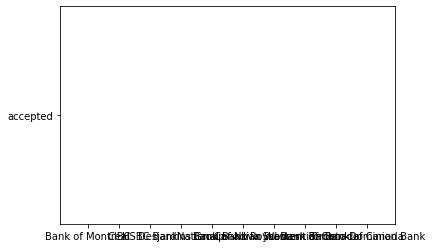

In [125]:
plt.bar(pandas_DF1['Bank_Name'], pandas_DF1['Loan_Status'])

In [169]:
pandas_DF3= pd.concat([pandas_DF1,pandas_DF2])

In [170]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='count'>

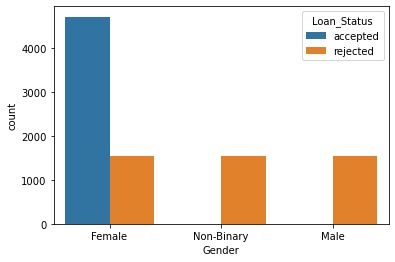

In [172]:
sns.countplot(x='Gender',hue='Loan_Status',data=pandas_DF3)

<AxesSubplot:xlabel='Married_Status', ylabel='count'>

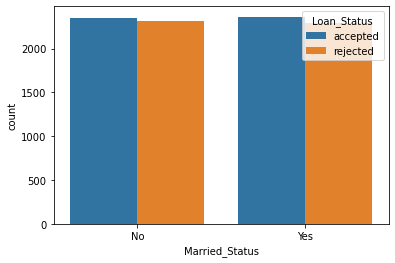

In [173]:
sns.countplot(x='Married_Status',hue='Loan_Status',data=pandas_DF3)

<AxesSubplot:xlabel='Home_Ownership_Status', ylabel='count'>

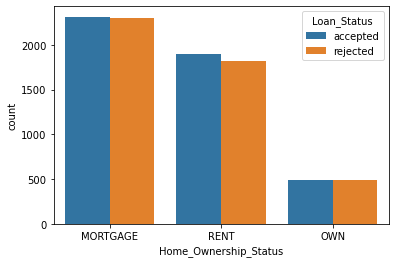

In [174]:
sns.countplot(x='Home_Ownership_Status',hue='Loan_Status',data=pandas_DF3)

<AxesSubplot:xlabel='Employee_Verification_Status', ylabel='count'>

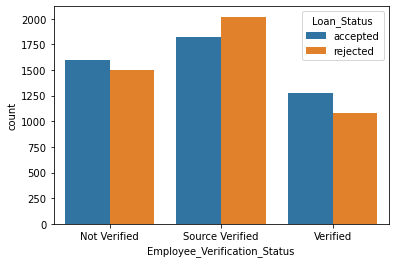

In [175]:
sns.countplot(x='Employee_Verification_Status',hue='Loan_Status',data=pandas_DF3)

<AxesSubplot:xlabel='Bank_Name', ylabel='Employee_Title'>

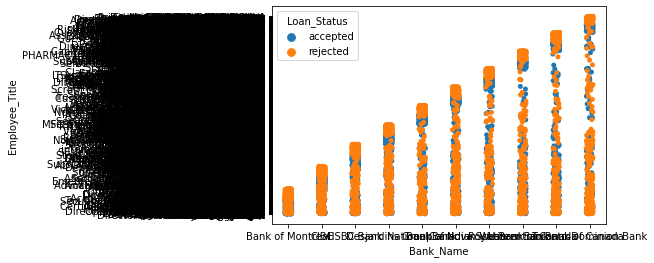

In [176]:
sns.stripplot(data=pandas_DF3, x="Bank_Name", y="Employee_Title", hue="Loan_Status")

In [182]:
pandas_DF4 = pandas_DF3[pandas_DF3.Bank_Name == 'CIBC']

<AxesSubplot:xlabel='Loan_Purpose', ylabel='count'>

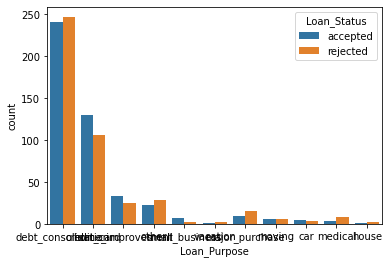

In [188]:
sns.countplot(x='Loan_Purpose',hue='Loan_Status',data=pandas_DF4)

In [193]:
pandas_DF4.query("loan_id == '68426831'")["Employee_Title"]

1    Veterinary Tecnician
Name: Employee_Title, dtype: object

In [192]:
pandas_DF4.head()

,loan_id,loan_amnt,loan_term,interest_rate,installment,loan_grade,Employee_Title,Employee_length,Home_Ownership_Status,Annual_Income,...,Loan_Purpose,Loan_Title,Province_Code,Total_Payment,Loan_Application_Type,Loan_Status,Bank_Name,Gender,Married_Status,Credit_Score
1,68426831,11950,36,13.44,405.18,C,Veterinary Tecnician,4,RENT,34000,...,debt_consolidation,Debt consolidation,YT,13708.95,Individual,accepted,CIBC,Female,Yes,719
7,68495092,8650,36,19.89,320.99,E,Program Coordinator,8,RENT,55000,...,debt_consolidation,Debt consolidation,PE,9190.49,Individual,accepted,CIBC,Female,Yes,669
16,66796130,8800,36,9.8,283.13,B,Sales Representative/ Agent,10,MORTGAGE,92000,...,credit_card,Credit card refinancing,ON,9852.88,Individual,accepted,CIBC,Female,Yes,784
20,68367009,14025,60,18.49,359.9,D,accts payable,10,MORTGAGE,39000,...,debt_consolidation,Debt consolidation,SK,16341.39,Individual,accepted,CIBC,Female,Yes,678
24,68394562,30000,36,15.77,1051.31,D,Vice-President,2,MORTGAGE,175000,...,home_improvement,Home improvement,AB,33903.77,Individual,accepted,CIBC,Female,Yes,739
